In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [2]:
df = pd.read_csv("D:\\ML\\28. ML - Handle Imbalanced.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
x = df.drop('Class' , axis = 1 )
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


### or 

In [4]:
x = df.drop(df.columns[-1 ] , axis = 1)
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [5]:
y = df['Class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [6]:
# from sklearn.model_selection import train_test_split

In [7]:
# x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state=0)

In [8]:
# x_train.shape , x_test.shape , y_train.shape , y_test.shape

## seaborn is used for visulization 

### we need to balnce the data , it contain only 0 values 

In [9]:
import seaborn as sns

<Axes: ylabel='count'>

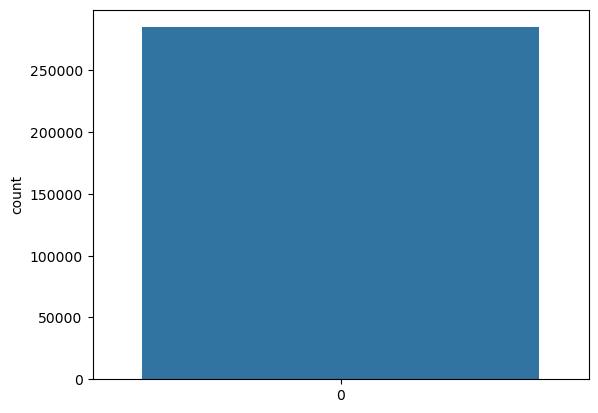

In [10]:
sns.countplot(y)         # only it contain 0

# Under Sampling

## in this majority size class is equal to the minarity size class 

In [11]:
from imblearn.under_sampling import RandomUnderSampler  #  in video have Nearmiss in place of RandomUnderSampler , but Nearmiss not work

In [12]:
# https://youtu.be/HtBDg619ozg?si=Wz6zyvEuciRBwrbh       # for clarification

In [13]:
ru1 = RandomUnderSampler(random_state = 0)
ru1

RandomUnderSampler(random_state=0)

In [14]:
x_res , y_res = ru1.fit_resample(x , y)

In [15]:
x.shape

(284807, 30)

In [16]:
y.shape

(284807,)

In [17]:
x_res.shape

(984, 30)

In [18]:
y_res.shape

(984,)

####  counter is used  to count the values

In [19]:
from collections import Counter

In [20]:
print(f'before under_sampling{Counter(y)}')   # the 0 are more and 1 are less 
print(f'before under_sampling{Counter(x)}')   # We no need to usee the x and x_res
 

before under_samplingCounter({0: 284315, 1: 492})
before under_samplingCounter({'Time': 1, 'V1': 1, 'V2': 1, 'V3': 1, 'V4': 1, 'V5': 1, 'V6': 1, 'V7': 1, 'V8': 1, 'V9': 1, 'V10': 1, 'V11': 1, 'V12': 1, 'V13': 1, 'V14': 1, 'V15': 1, 'V16': 1, 'V17': 1, 'V18': 1, 'V19': 1, 'V20': 1, 'V21': 1, 'V22': 1, 'V23': 1, 'V24': 1, 'V25': 1, 'V26': 1, 'V27': 1, 'V28': 1, 'Amount': 1})


In [21]:
print(f'After under_sampling {Counter(y_res)}')   # it will balance the data 0 and 1  in low values

After under_sampling Counter({0: 492, 1: 492})


# over Sampling 

## in this minority size class is equal to the majority size class 

In [22]:
from imblearn.over_sampling import RandomOverSampler

In [23]:
ru2 = RandomOverSampler(random_state= 0)
ru2

RandomOverSampler(random_state=0)

In [24]:
x_res1 , y_res1 = ru2.fit_resample(x , y)

In [25]:
x.shape

(284807, 30)

In [26]:
x_res1.shape

(568630, 30)

In [27]:
y.shape

(284807,)

In [28]:
y_res1.shape

(568630,)

In [29]:
from collections import Counter

In [30]:
print(f'before over_sampling{Counter(y)}')                  #               

before over_samplingCounter({0: 284315, 1: 492})


In [31]:
print(f'After over_sampling {Counter(y_res1)}')       # it balance the 0 and 1  in high values

After over_sampling Counter({0: 284315, 1: 284315})
